![](../../header1.jpg)

# Mapping the Earth

Kevin Walchko

---

GPS gives us the location of our position anywhere on Earth (provided we can "see" the satellites). However, those coordinates are our location on a sphere and they are in degrees ... it would be better if we could convert them to a local coordinate in something more useful like meters.

## Local Tangent Plane

The first step is to define a plane at your current GPS location. The plane is defined such that it is tangent to the surface of a sphere.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/73/ECEF_ENU_Longitude_Latitude_relationships.svg/220px-ECEF_ENU_Longitude_Latitude_relationships.svg.png)

This is all well and good, but the Earth is not a sphere, it is an obleque shape where the equitorial radius of the Earth is larger than the polar radius. Said another way, the width from one side of the Earth to the other at the equator is larger than the width from the North to South pole. The reallity is the Earth is old and has gotten kind of fat around its equator ... it happens to everyone.

## Local Frames

- **NED:** North, East, Down. This is liked because all rotations about an axis (righthand rule) are seen as positive. The negative to this frame is down is posative since the z-axis points down. This is similar to the aerospace body frame seen on aircraft.
- **ENU:** East, North, Up. This is liked because up is up, but unlike NED, the positive direction for pitch and yaw are both counter clockwise which some don't like.

# References

- [Earth's ellisoid](https://en.wikipedia.org/wiki/Earth_ellipsoid)
- [World Geodetic System](https://en.wikipedia.org/wiki/World_Geodetic_System#A_new_World_Geodetic_System:_WGS_84)
- [World Magnetic Model](https://en.wikipedia.org/wiki/World_Magnetic_Model)
- [World Gravitational Model](https://en.wikipedia.org/wiki/Earth_Gravitational_Model)

In [1]:
# reload library
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from numpy.linalg import norm
from numpy import arcsin, cos, sin, pi, sqrt, arcsin as asin, arctan2 as atan2
from matplotlib import pyplot as plt

np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

In [21]:
from ins_nav import NavigationFrame
from ins_nav import WGS84

from jtb import getCodeImport

In [4]:
# GPS locations for places on the Earth
lyon = (45.7597, 4.8422, 0) # (lat, lon, alt)
paris = (48.8567, 2.3508, 0)
newyork = (40.730610, -73.935242, 0)

deg2rad = np.pi/180
rad2deg = 180/np.pi

In [12]:
wgs = WGS84()

Max radius differnce: 21.38 km
US is about 40 deg latitude: 9.802 m/s^2


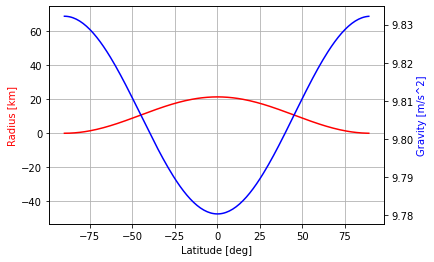

In [13]:
lats = np.arange(-90,90,1)

print(f"Max radius differnce: {(wgs.radius(0) - wgs.radius(90))/1000:.2f} km")
print(f"US is about 40 deg latitude: {wgs.gravity(40):.3f} m/s^2")

# not thrilled, but in order to plot clearly, I subtracted
# off the radius at the pole. Thus you can see it better
earth_r = (wgs.radius(lats) - wgs.radius(90)) / 1000

fig, ax1 = plt.subplots()

ax1.plot(lats,earth_r, 'r-',label="Radius [km]")
ax1.axis('equal')
ax1.set_ylabel("Radius [km]", color='r')
ax1.set_xlabel("Latitude [deg]")

# higher gravity the closer to the center of the Earth,
# poles are closer than equator, so higher gravity at poles
ax2 = ax1.twinx()
ax2.plot(lats, wgs.gravity(lats), 'b-', label="Gravity [m/s^2]")
ax2.set_ylabel("Gravity [m/s^2]", color='b')
ax1.grid(True);

In [15]:
pecef = wgs.llh2ecef(paris)

fr = NavigationFrame(paris)
enu = fr.ecef2enu(pecef)
pecef2 = fr.enu2ecef(enu)
paris2 = wgs.ecef2llh(pecef2)
print("ECEF:", pecef, pecef2)
print("ECEF diff:", pecef - pecef2)
print("--------------")
print("lla:", paris, paris2)
print("lla diff:", paris - paris2)

ECEF: [4200910.643  172456.785 4780088.659] [4200910.643  172456.785 4780088.659]
ECEF diff: [0. 0. 0.]
--------------
lla: (48.8567, 2.3508, 0) [48.857  2.351  0.   ]
lla diff: [0. 0. 0.]


In [16]:
pecef = wgs.llh2ecef(paris)
pecef += [100,200,300]

fr = NavigationFrame(paris)
enu = fr.ecef2enu(pecef)
pecef2 = fr.enu2ecef(enu)

print("Delta:", norm([100,200,300]))
print("ECEF:", pecef, pecef2)
print("ENU", enu, norm(enu))

Delta: 374.16573867739413
ECEF: [4201010.643  172656.785 4780388.659] [4201010.643  172589.999 4780388.659]
ENU [195.73  115.962 297.056] 374.16573867420504


In [17]:
# google says 5,834 km New York to Paris
print(f"{wgs.haversine(newyork, paris) / 1000:.1f}")

5831.2


In [18]:
# this should match our equatorial and polar radius of the Earth equation
# said another way, the difference should be 0 if they match (or really small)
print("radius(90) diff:", wgs.radius(90) - wgs.b)
print("radius(0) diff", wgs.radius(0) - wgs.a)

radius(90) diff: 0.0
radius(0) diff 0.0


# Appendix A: NavigationFrame

In [22]:
getCodeImport(NavigationFrame)

# Appendix B: WGS84

In [23]:
getCodeImport(WGS84)